# Import librairies

In [1]:
# To check PEP8 need installation : pip install flake8 pycodestyle pycodestyle_magic
# add %%flake8 in each block to check it
%load_ext pycodestyle_magic

In [2]:
# %%flake8

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, \
    cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer, roc_curve, \
    roc_auc_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import shap
import pickle

# Load data files

In [3]:
# %%flake8

# load datas
data_train = pd.read_csv('data_train.csv')
data_train = data_train.set_index('SK_ID_CURR')

# Overview of data

In [4]:
# %%flake8

# To optimize display of the Dataframe

# increase max rows displayed to 999
pd.set_option('display.max_rows', 999)

# increase max columns displayed to 999
pd.set_option('display.max_columns', 999)
# increase columns width to 100
pd.set_option('display.max_colwidth', 200)

# Formating float
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# %%flake8

# define random_state
rd_state = 16

**Train data**

In [6]:
data_train.head(10)

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Cult

In [7]:
data_train.describe(include='all')

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Cult

In [8]:
data_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 244 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    NAME_CONTRACT_TYPE                                 307511 non-null  int64  
 1    FLAG_OWN_CAR                                       307511 non-null  int64  
 2    FLAG_OWN_REALTY                                    307511 non-null  int64  
 3    CNT_CHILDREN                                       307511 non-null  int64  
 4    AMT_INCOME_TOTAL                                   307511 non-null  float64
 5    AMT_CREDIT                                         307511 non-null  float64
 6    AMT_ANNUITY                                        307499 non-null  float64
 7    AMT_GOODS_PRICE                                    307233 non-null  float64
 8    REGION_POPULATION_RELATIVE                         307511

In [9]:
print('data_train number of rows : {}' .format(data_train.shape[0]))
print('data_train number of columns : {}' .format(data_train.shape[1]))

data_train number of rows : 307511
data_train number of columns : 244


In [10]:
# %%flake8

def pie_df_column(datas, title, rotatelabels=0, autopct='%1.1f%%'):
    """ create a function to display a pie of a column from a dataframe """

    # if there's more than 10 labels hide it
    if datas.dropna().nunique() > 10:
        labels = None
    else:
        labels = datas.dropna().unique()
    plt.figure(figsize=(7, 7))
    plt.pie(datas.value_counts(), labels=labels,
            autopct=autopct, startangle=90, rotatelabels=rotatelabels)
    plt.title(title)

    # to save graph
    plt.savefig('figures/' + title + '.png', bbox_inches='tight')

    plt.show()

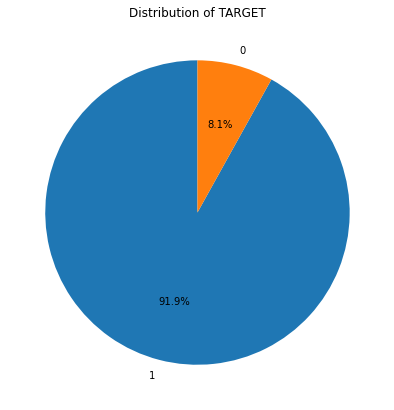

In [11]:
# %%flake8

# pie about the first category of product (use function pie_df_column)
pie_df_column(
    data_train['TARGET'],
    'Distribution of TARGET')

# Modelization test

## Split train / test data

In [12]:
# %%flake8

# split data between features and target
X = data_train.drop(columns=['TARGET'])
y = data_train['TARGET']

# Features name
features = list(data_train.drop(columns=['TARGET']).columns)

In [13]:
# %%flake8

# Separation training / testing set use stratify due to classes are imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=rd_state, stratify=y)

X_train.shape

(246008, 243)

In [14]:
# %%flake8

# To improve speed of the testing model sampling X_train due to the number of data
X_sample_train, X_sample_test, y_sample_train, y_sample_test = \
    train_test_split(
        X_train, y_train, train_size=0.2,
        random_state=rd_state, stratify=y_train)

X_sample_train.shape

(49201, 243)

## Testing model

In [15]:
# %%flake8

# create a fbeta score
f2_scorer = make_scorer(fbeta_score, beta=2)
# dictionnary of score
scores = {'AUC': 'roc_auc', 'fbeta': f2_scorer,
          'precision_recall_curve': 'average_precision'}

In [16]:
# %%flake8

# define cv
cv = KFold(5, shuffle=True, random_state=0)

In [17]:
# %%flake8

def test_model_grid(X_train, y_train, steps, params):
    ''' create function to test different model with GridSearchCV '''

    pipeline = imbpipeline(steps=steps)

    grid = GridSearchCV(
        pipeline, param_grid=params, cv=cv, return_train_score=True,
        scoring=scores, refit='precision_recall_curve', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

In [18]:
# %%flake8

def test_model_randomsearch(X_train, y_train, steps, params, nb_iter):
    ''' create function to test different model with RandomSearchCV'''

    pipeline = imbpipeline(steps=steps)

    randomscv = RandomizedSearchCV(
        pipeline, param_distributions=params, n_iter=nb_iter,
        cv=cv, return_train_score=True,
        scoring=scores, refit='precision_recall_curve', random_state=rd_state, n_jobs=-1)
    randomscv.fit(X_train, y_train)
    return randomscv

In [19]:
# %%flake8

def pipeline_steps(classifier):
    ''' function to create steps of a pipeline '''
    
    # parameters to test models

    # Median imputation of missing values
    imputer = SimpleImputer(strategy='median')

    # Normalize values
    scaler = StandardScaler()

    # class are imbalanced
    # oversampling of the minority class
    over = SMOTE(random_state=rd_state)
    # undersampling of the majority class
    under = RandomUnderSampler(random_state=rd_state)

    # steps for the pipeline
    steps = [['imputer', imputer], ['scaler', scaler],
             ['over', over], ['under', under],
             ['classifier', classifier]]
    return steps

### Dumy classifier

In [20]:
# %%flake8

# parameters to test for DummyClassifier

# create pipeline for classifier to test
steps_dc = pipeline_steps(DummyClassifier(random_state=rd_state))

# parameters to test
params_dc = {'over__sampling_strategy': [0.1, 0.2, 0.3],
             'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_dc = 1

In [21]:
# # %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_dc = test_model_grid(
#     X_sample_train, y_sample_train, steps_dc, params_dc)

In [22]:
%%time

# %%flake8

# use function test_model_randomsearch
random_dc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_dc, params_dc, n_iter_dc)

Wall time: 20.8 s


In [23]:
# %%flake8

def display_result(model_selection, model):
    ''' create function to display dataframe of the results '''
    
    results = pd.DataFrame(model_selection.cv_results_)
    results.insert(0, 'Model', model)
    display(results)
    return results

In [24]:
# %%flake8

# use function display_result to display dataframe
# of the result for DummyClassifier
results_dc = display_result(
    random_dc, 'DummyClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,DummyClassifier,5.24,1.14,0.66,0.08,0.40,0.30,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3}",0.50,0.50,0.50,0.50,0.50,0.50,0.00,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.08,0.09,0.08,0.08,0.08,0.00,1,0.08,0.08,0.08,0.08,0.08,0.08,0.00


In [25]:
# %%flake8

def display_score(result, model_selection):
    ''' create function to display scores and best params for a model '''

    print('Fit time: %.2f' % result.loc[model_selection.best_index_]['mean_fit_time'])
    print('AUC score: %.3f' % result.loc[model_selection.best_index_]['mean_test_AUC'])
    print('f2score: %.3f' % result.loc[model_selection.best_index_]
          ['mean_test_fbeta'])
    print('precision_recall_curve score: %.3f' % model_selection.best_score_)
    print('Best parameters: %s' % model_selection.best_params_)

In [26]:
# %%flake8
# use function display_score to display score and
# best_params for DummyClassifier
display_score(results_dc, random_dc)

Fit time: 5.24
AUC score: 0.500
f2score: 0.000
precision_recall_curve score: 0.081
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3}


In [27]:
# %%flake8

# save results to csv
results_dc.to_csv('results_dummyclassifier.csv', index = False)

### Logistic Regression

In [28]:
# %%flake8

# parameters to test for LogisticRegression

# create pipeline for classifier to test
steps_lr = pipeline_steps(LogisticRegression(random_state=rd_state, max_iter=10000))

# parameters to test
params_lr = {'classifier__C': [0.1, 1, 10, 100],
                             'over__sampling_strategy': [0.1, 0.2, 0.3],
                             'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_lr = 30

In [29]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_lr = test_model_grid(
#     X_sample_train, y_sample_train, steps_lr,
#     params_lr)

In [30]:
%%time

# %%flake8

# use function test_model_randomsearch
random_lr = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_lr, params_lr, n_iter_lr)

Wall time: 10min 6s


In [31]:
# %%flake8

# use function display_result to display
# dataframe of the result for LogisticRegression
results_lr = display_result(random_lr, 'LogisticRegression')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__C,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,LogisticRegression,21.21,2.58,0.73,0.11,0.40,0.20,100,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__C': 100}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,15,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.32,0.31,0.32,0.31,0.30,0.31,0.01,22,0.34,0.34,0.33,0.32,0.34,0.33,0.01,0.22,0.21,0.23,0.20,0.19,0.21,0.01,13,0.22,0.23,0.22,0.23,0.24,0.23,0.01
1,LogisticRegression,9.37,0.72,0.81,0.14,0.50,0.30,0.10,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__C': 0.1}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,20,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.34,0.33,0.36,0.35,0.34,0.34,0.01,20,0.36,0.37,0.36,0.37,0.36,0.36,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.01,18,0.22,0.23,0.22,0.23,0.23,0.23,0.00
2,LogisticRegression,12.27,0.39,0.68,0.03,0.60,0.20,10,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__C': 10}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,18,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.37,0.35,0.38,0.37,0.37,0.37,0.01,10,0.39,0.39,0.39,0.39,0.39,0.39,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,16,0.22,0.23,0.22,0.22,0.23,0.23,0.00
3,LogisticRegression,10.39,1.28,0.69,0.06,0.50,0.10,100,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__C': 100}",0.74,0.73,0.73,0.74,0.73,0.73,0.00,9,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.35,0.34,0.36,0.34,0.35,0.35,0.01,14,0.36,0.37,0.37,0.37,0.37,0.37,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,20,0.22,0.23,0.22,0.22,0.23,0.22,0.01
4,LogisticRegression,10.01,0.31,0.76,0.06,0.40,0.30,0.10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__C': 0.1}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,21,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.31,0.30,0.32,0.31,0.31,0.31,0.00,27,0.33,0.33,0.32,0.33,0.33,0.33,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.02,4,0.22,0.23,0.22,0.23,0.23,0.23,0.00
5,LogisticRegression,17.81,1.62,0.78,0.10,0.60,0.20,100,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__C': 100}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,19,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.37,0.35,0.38,0.37,0.37,0.37,0.01,9,0.39,0.39,0.39,0.39,0.39,0.39,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,17,0.22,0.23,0.22,0.22,0.23,0.23,0.00
6,LogisticRegression,15.37,1.09,0.71,0.06,0.40,0.20,10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__C': 10}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,14,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.31,0.31,0.32,0.31,0.30,0.31,0.01,21,0.34,0.34,0.33,0.32,0.34,0.33,0.01,0.22,0.21,0.23,0.20,0.19,0.21,0.01,12,0.22,0.23,0.22,0.23,0.24,0.23,0.01
7,LogisticRegression,15.78,1.15,0.76,0.05,0.40,0.30,1,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__C': 1}",0.74,0.72,0.73,0.73,0.72,0.73,0.01,24,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.31,0.30,0.32,0.31,0.31,0.31,0.00,26,0.33,0.33,0.32,0.32,0.33,

In [32]:
# %%flake8

# use function display_score to display score and
# best_params for LogisticRegression
display_score(results_lr, random_lr)

Fit time: 5.35
AUC score: 0.734
f2score: 0.304
precision_recall_curve score: 0.212
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__C': 0.1}


In [33]:
# %%flake8

# save results to csv
results_lr.to_csv('results_logisticregression.csv', index = False)

### Random Forest Classifier

In [34]:
# %%flake8

# parameters to test for RandomForestClassifier

# create pipeline for classifier to test
steps_rfc = pipeline_steps(RandomForestClassifier(random_state=rd_state))

# parameters to test
params_rfc = {
    'classifier__max_depth': np.arange(10, 50, 5),
    'classifier__min_samples_split': np.arange(2, 20, 2),
    'classifier__bootstrap': [True],
    'over__sampling_strategy': [0.1, 0.2, 0.3],
    'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_rfc = 25

In [35]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_rfc = test_model_grid(
#     X_sample_train, y_sample_train, steps_rfcr,
#     params_rfc)

In [36]:
%%time

# %%flake8

# use function test_model_randomsearch
random_rfc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_rfc, params_rfc, n_iter_rfc)

Wall time: 8min 18s


In [37]:
# %%flake8

# use function display_result to display
# dataframe of the result for RandomForestClassifier
results_rfc = display_result(
    random_rfc, 'RandomForestClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier__bootstrap,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,RandomForestClassifier,7.06,0.22,1.12,0.07,0.60,0.10,14,35,True,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 14, 'classifier__max_depth': 35, 'classifier__bootstrap': True}",0.74,0.71,0.73,0.72,0.72,0.72,0.01,5,0.97,0.97,0.97,0.97,0.97,0.97,0.00,0.30,0.28,0.31,0.31,0.30,0.30,0.01,3,0.79,0.78,0.78,0.79,0.78,0.79,0.01,0.22,0.20,0.21,0.20,0.19,0.20,0.01,2,0.76,0.74,0.74,0.78,0.75,0.75,0.01
1,RandomForestClassifier,5.93,0.02,0.86,0.03,0.50,0.10,12,10,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 12, 'classifier__max_depth': 10, 'classifier__bootstrap': True}",0.74,0.71,0.73,0.73,0.72,0.72,0.01,4,0.86,0.86,0.86,0.86,0.86,0.86,0.00,0.18,0.17,0.19,0.18,0.19,0.18,0.01,8,0.34,0.36,0.35,0.34,0.35,0.35,0.01,0.22,0.19,0.21,0.20,0.18,0.20,0.01,7,0.40,0.40,0.39,0.41,0.40,0.40,0.01
2,RandomForestClassifier,7.10,0.22,1.11,0.02,0.50,0.10,2,25,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 2, 'classifier__max_depth': 25, 'classifier__bootstrap': True}",0.73,0.71,0.73,0.72,0.72,0.72,0.01,9,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.26,0.24,0.24,0.26,0.22,0.24,0.02,7,0.89,0.88,0.89,0.90,0.89,0.89,0.00,0.22,0.19,0.22,0.20,0.17,0.20,0.02,9,0.98,0.98,0.98,0.98,0.98,0.98,0.00
3,RandomForestClassifier,14.57,0.31,1.11,0.06,0.50,0.30,14,35,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 14, 'classifier__max_depth': 35, 'classifier__bootstrap': True}",0.73,0.70,0.71,0.70,0.71,0.71,0.01,19,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.01,0.02,0.03,0.02,0.02,0.02,0.01,21,0.66,0.68,0.67,0.68,0.69,0.68,0.01,0.20,0.18,0.21,0.18,0.16,0.19,0.02,19,0.97,0.97,0.97,0.98,0.97,0.97,0.00
4,RandomForestClassifier,14.41,0.29,1.13,0.08,0.50,0.30,2,20,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 2, 'classifier__max_depth': 20, 'classifier__bootstrap': True}",0.72,0.70,0.71,0.70,0.70,0.71,0.01,23,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.02,0.02,0.03,0.03,0.02,0.02,0.01,20,0.93,0.94,0.93,0.93,0.92,0.93,0.01,0.19,0.17,0.20,0.18,0.16,0.18,0.02,24,0.99,0.99,0.99,0.99,0.99,0.99,0.00
5,RandomForestClassifier,16.88,0.22,1.15,0.05,0.40,0.30,14,35,True,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 14, 'classifier__max_depth': 35, 'classifier__bootstrap': True}",0.72,0.70,0.71,0.70,0.70,0.71,0.01,22,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,23,0.55,0.57,0.56,0.56,0.58,0.56,0.01,0.20,0.18,0.21,0.18,0.16,0.18,0.02,20,0.99,0.99,0.99,0.99,0.99,0.99,0.00
6,RandomForestClassifier,6.32,0.40,1.10,0.05,0.60,0.10,10,30,True

In [38]:
# %%flake8

# use function display_score to display score and
# best_params for RandomForestClassifier
display_score(results_rfc, random_rfc)

Fit time: 6.63
AUC score: 0.725
f2score: 0.244
precision_recall_curve score: 0.204
Best parameters: {'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 18, 'classifier__max_depth': 40, 'classifier__bootstrap': True}


In [39]:
# %%flake8

# save results to csv
results_rfc.to_csv('results_randomforestclassifier.csv', index = False)

### Hist Gradient Boosting Classifier

In [40]:
# %%flake8

# parameters to test for HistGradientBoostingClassifier

# create pipeline for classifier to test
steps_hgbc = pipeline_steps(HistGradientBoostingClassifier(random_state=rd_state))

# parameters to test
params_hgbc = {
    'classifier__loss': ['binary_crossentropy'],
    'classifier__learning_rate': np.arange(0.05,0.2, 0.05),
    'classifier__max_iter':np.arange(100,400, 100),
    'classifier__max_depth': np.arange(10, 100, 10),
    'over__sampling_strategy': [0.1, 0.2, 0.3],
    'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_hgbc = 25

In [41]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_hgbc = test_model_grid(
#     X_sample_train, y_sample_train, steps_hgbc,
#     params_hgbc)

In [42]:
%%time

# %%flake8

# use function test_model_randomsearch
random_hgbc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_hgbc, params_hgbc, n_iter_hgbc)

Wall time: 10min 28s


In [43]:
# %%flake8

# use function display_result to display
# dataframe of the result for HistGradientBoostingClassifier
results_hgbc = display_result(
    random_hgbc, 'HistGradientBoostingClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__max_iter,param_classifier__max_depth,param_classifier__loss,param_classifier__learning_rate,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,HistGradientBoostingClassifier,22.44,1.70,0.77,0.02,0.40,0.30,200,90,binary_crossentropy,0.10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__max_iter': 200, 'classifier__max_depth': 90, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.73,0.74,0.73,0.73,0.73,0.01,9,0.88,0.90,0.92,0.91,0.91,0.90,0.01,0.06,0.04,0.06,0.05,0.06,0.05,0.01,24,0.14,0.17,0.18,0.19,0.21,0.18,0.02,0.23,0.20,0.23,0.20,0.19,0.21,0.02,7,0.48,0.53,0.58,0.56,0.57,0.54,0.04
1,HistGradientBoostingClassifier,10.43,1.24,0.70,0.04,0.60,0.20,100,60,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 100, 'classifier__max_depth': 60, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.73,0.73,0.71,0.71,0.73,0.01,18,0.85,0.87,0.88,0.91,0.89,0.88,0.02,0.24,0.24,0.24,0.22,0.23,0.23,0.01,10,0.36,0.42,0.43,0.53,0.48,0.44,0.06,0.23,0.20,0.23,0.19,0.17,0.20,0.02,16,0.35,0.41,0.41,0.52,0.45,0.43,0.05
2,HistGradientBoostingClassifier,14.68,1.84,0.75,0.05,0.40,0.20,200,20,binary_crossentropy,0.15,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 200, 'classifier__max_depth': 20, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.72,0.73,0.73,0.72,0.73,0.01,16,0.88,0.89,0.93,0.90,0.91,0.90,0.02,0.12,0.14,0.14,0.13,0.13,0.13,0.01,18,0.28,0.31,0.45,0.33,0.39,0.35,0.06,0.21,0.20,0.22,0.20,0.19,0.20,0.01,15,0.45,0.48,0.61,0.50,0.54,0.52,0.05
3,HistGradientBoostingClassifier,12.41,1.87,0.72,0.05,0.40,0.20,100,80,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 100, 'classifier__max_depth': 80, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.72,0.72,0.72,0.72,0.72,0.72,0.00,22,0.92,0.87,0.93,0.92,0.87,0.90,0.03,0.14,0.15,0.15,0.15,0.14,0.15,0.01,16,0.42,0.28,0.44,0.39,0.28,0.36,0.07,0.20,0.20,0.21,0.19,0.18,0.20,0.01,22,0.58,0.42,0.58,0.55,0.42,0.51,0.07
4,HistGradientBoostingClassifier,25.76,0.24,1.08,0.02,0.60,0.10,300,80,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 300, 'classifier__max_depth': 80, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.72,0.71,0.71,0.71,0.71,0.71,0.01,24,0.98,0.98,0.98,0.98,0.98,0.98,0.00,0.35,0.34,0.34,0.35,0.33,0.34,0.01,2,0.76,0.76,0.76,0.76,0.76,0.76,0.00,0.21,0.18,0.21,0.18,0.17,0.19,0.02,24,0.71,0.72,0.73,0.73,0.72,0.72,0.01
5,HistGradientBoostingClassifier,25.82,0.19,1.08,0.02,0.60,0.10,300,40,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy

In [44]:
# %%flake8

# use function display_score to display score and
# best_params for GradientBoostingClassifier
display_score(results_hgbc, random_hgbc)

Fit time: 12.48
AUC score: 0.740
f2score: 0.331
precision_recall_curve score: 0.216
Best parameters: {'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 100, 'classifier__max_depth': 30, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': 0.05}


In [45]:
# %%flake8

# save results to csv
results_hgbc.to_csv('results_histgradientboostingclassifier.csv', index = False)

## Compare models

In [46]:
# %%flake8

# create a dataframe with the best parameters for each model
result = pd.concat([results_dc.iloc[[random_dc.best_index_]],
                    results_lr.iloc[[random_lr.best_index_]],
                    results_rfc.iloc[[random_rfc.best_index_]],
                    results_hgbc.iloc[[random_hgbc.best_index_]]])
result

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve,param_classifier__C,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier__bootstrap,param_classifier__max_iter,param_classifier__loss,param_classifier__learning_rate
0,DummyClassifier,5.24,1.14,0.66,0.08,0.40,0.30,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3}",0.50,0.50,0.50,0.50,0.50,0.50,0.00,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.08,0.09,0.08,0.08,0.08,0.00,1,0.08,0.08,0.08,0.08,0.08,0.08,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,LogisticRegression,5.35,0.38,0.61,0.09,0.40,0.10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__C': 0.1}",0.74,0.73,0.74,0.74,0.73,0.73,0.00,1,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.31,0.30,0.32,0.29,0.30,0.30,0.01,30,0.32,0.33,0.32,0.32,0.32,0.32,0.00,0.22,0.20,0.24,0.20,0.19,0.21,0.02,1,0.23,0.23,0.22,0.23,0.24,0.23,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
19,RandomForestClassifier,6.63,0.28,1.12,0.06,0.50,0.10,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 18, 'classifier__max_depth': 40, 'classifier__bootstrap': True}",0.74,0.71,0.73,0.72,0.72,0.72,0.01,3,0.97,0.97,0.97,0.97,0.97,0.97,0.00,0.25,0.24,0.25,0.24,0.25,0.24,0.01,5,0.76,0.75,0.75,0.76,0.76,0.76,0.01,0.22,0.20,0.22,0.20,0.19,0.20,0.01,1,0.74,0.73,0.73,0.76,0.73,0.74,0.01,NaN,18,40,True,NaN,NaN,NaN
8,HistGradientBoostingClassifier,12.48,0.19,0.84,0.06,0.50,0.10,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 100, 'classifier__max_depth': 30, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.75,0.74,0.74,0.75,0.73,0.74,0.01,1,0.84,0.84,0.83,0.84,0.84,0.84,0.00,0.32,0.32,0.34,0.34,0.33,0.33,0.01,5,0.45,0.45,0.44,0.45,0.47,0.45,0.01,0.22,0.21,0.24,0.21,0.19,0.22,0.02,1,0.33,0.33,0.33,0.34,0.35,0.34,0.01,NaN,NaN,30,NaN,100,binary_crossentropy,0.05


In [47]:
# %%flake8

def graph_score_model(results):
    ''' create a function du display graph of the score for each model '''

    width = 0.3
    plt.style.use('bmh')
    x = np.arange(len(results))
    n_col = len(scores)
    fig, ax = plt.subplots(1, n_col, figsize=(20, 6))
    fig.suptitle('Score per model\n', fontsize=15, fontweight='bold')
    i = 0
    for key, values in scores.items():
        ax[i].bar(x - width/2, results['mean_train_'+key],
                  width, label='Train')
        ax[i].bar(x+width/2, results['mean_test_'+key],
                  width, label='Test')
        ax[i].set_xlabel('\nModel')
        ax[i].set_ylabel('Score ' + key)
        ax[i].set_title('Score ' + key + ' per model')
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(results['Model'], rotation=45)
        ax[i].legend()
        i += 1

    # to save graph
    plt.savefig('figures/Score per model.png', bbox_inches='tight')

    plt.show()

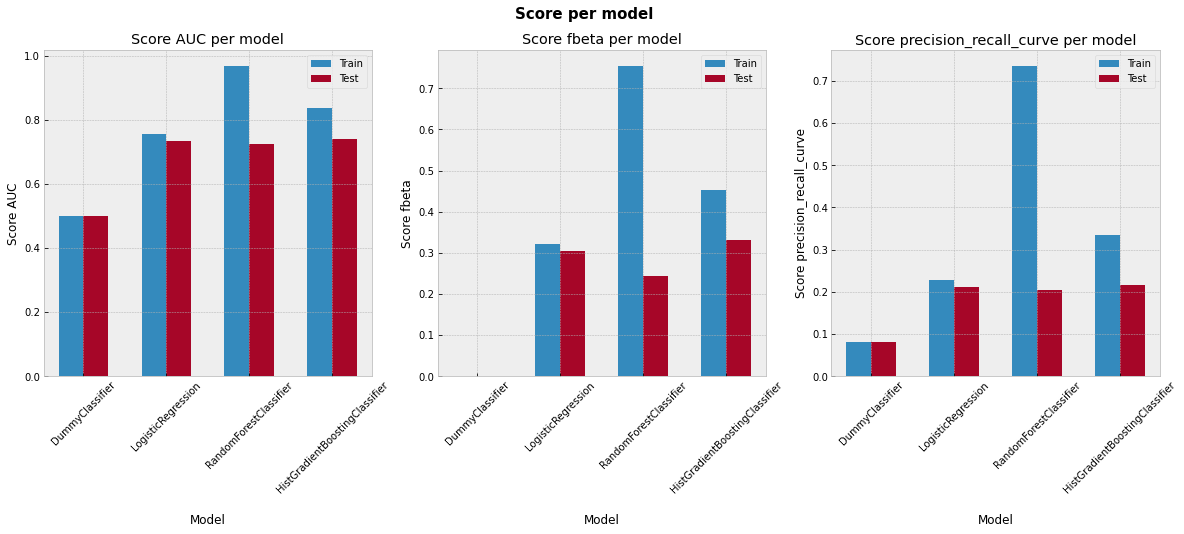

In [48]:
# %%flake8

# use function graph_score_model to display score for each models
graph_score_model(result)

For these 2 score(AUC, fbeta, precision_recal_curve) the biggest score is the better.

RandomForestClassifier seems to overfit.
The scores for LogisticsRegression and HistGradientBoostingClassifier are around the same and are the better.

In [49]:
# %%flake8

def graph_time_model(results):
    ''' create a function du display graph of the time for each model '''

    width = 0.2
    x = np.arange(len(results))
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.bar(x - width/2, results['mean_score_time'],
           width, label='Predict')
    ax.bar(x + width/2, results['mean_fit_time'],
           width, label='Fit')

    ax.set_xlabel('\nModel')
    ax.set_ylabel('Time(s)')
    plt.title('Time per model')
    plt.xticks(x, results['Model'], rotation=45)
    ax.legend()

    # to save graph
    plt.savefig('figures/Time per model.png', bbox_inches='tight')

    plt.show()

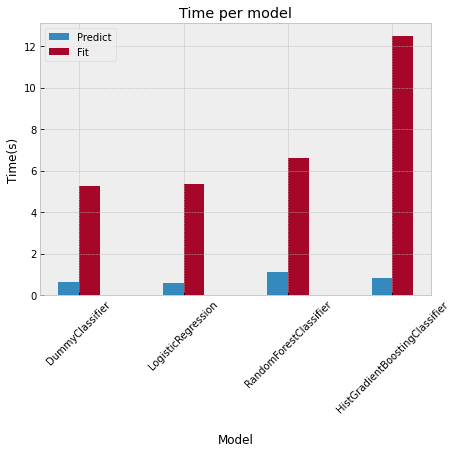

In [50]:
# %%flake8

# use function graph_time_model to display time for each models
graph_time_model(result)

The time speed of the model is better for LogisticsRegression than HistGradientBoostingClassifier

So the better compromise on score and time is the model LogisticsRegression

In [51]:
# save model selected
model_selected = random_lr

# Model analysis

## Predict values

In [52]:
# %%flake8

def predict_proba_y(model, X):
    ''' function to predict_proba for a model '''
    
    y_predict_proba = model.predict_proba(X.values)
    
    # keep probabilities for the positive outcome only
    y_predict_proba = y_predict_proba[:, 1]
    
    return y_predict_proba

In [53]:
# %%flake8

# create a new sampling of X_train with more datas
X_sample2_train, X_sample2_test, y_sample2_train, y_sample2_test = \
    train_test_split(
        X_train, y_train, train_size=0.8,
        random_state=rd_state, stratify=y_train)

In [54]:
# %%flake8

# fit model selected with the new sampling
model = model_selected.best_estimator_
model.fit(X_sample2_train.values, y_sample2_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('over', SMOTE(random_state=16, sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=16, sampling_strategy=0.4)),
                ['classifier',
                 LogisticRegression(C=0.1, max_iter=10000, random_state=16)]])

In [55]:
# %%flake8

# predict probabilities for model
y_predict_proba = predict_proba_y(model, X_sample2_test)

 ## Receiver Operating Characteristic (ROC) curve

Best Threshold=0.284364,       G-Mean=0.680


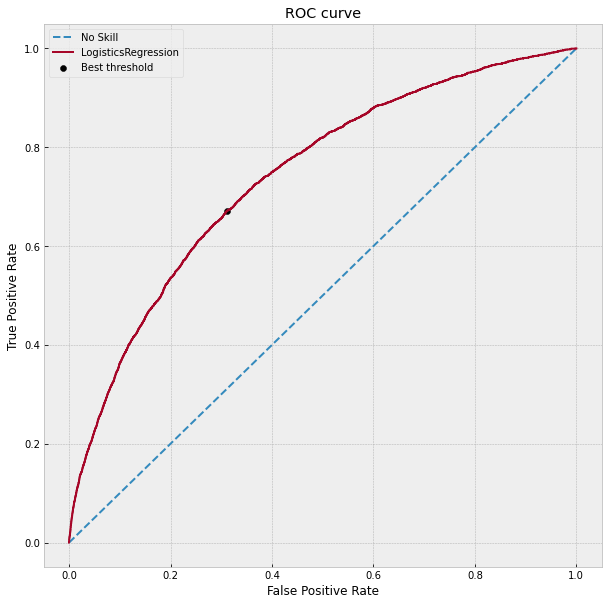

In [56]:
# %%flake8

# calculate roc curves for model
fpr, tpr, thresholds = roc_curve(y_sample2_test, y_predict_proba)

# calculate the g-mean for each threshold of LogisticsRegression
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the best g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, \
      G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.figure(figsize=(10, 10))

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='LogisticsRegression')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black',
            label='Best threshold')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

# to save graph
plt.savefig('figures/ROC curve.png', bbox_inches='tight')
    
# show the plot
plt.show()

## Precision-Recall curve

invalid value encountered in true_divide


Best Threshold=0.443307, F-Score=0.292


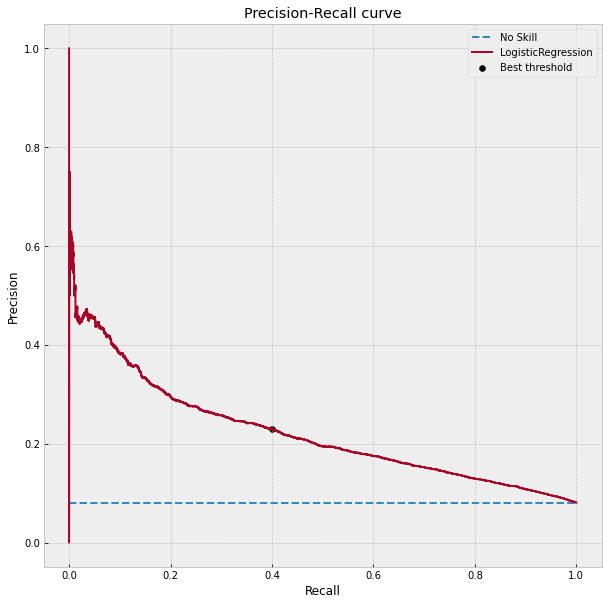

In [57]:
# %%flake8

# calculate Precision-Recall curve for model
precision, recall, thresholds = precision_recall_curve(y_sample2_test,
                                                       y_predict_proba)

# calculate fscore for model
fscore = np.where((precision == 0) & (recall == 0), 0,
                  (2 * precision * recall)/(precision + recall))

# locate the index of the best fscore
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
plt.figure(figsize=(10, 10))

no_skill = len(y_sample2_test[y_sample2_test == 1]) / len(y_sample2_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

plt.plot(recall, precision, label='LogisticRegression')
plt.scatter(recall[ix], precision[ix], marker='o',
            color='black', label='Best threshold')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()

# to save graph
plt.savefig('figures/Precision-Recall curve.png', bbox_inches='tight')

# show the plot
plt.show()

## Threshold optimization

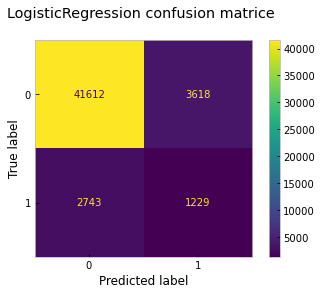

In [58]:
# %%flake8

# display confusion matrix with thershold = 0.5
cm = confusion_matrix(y_sample2_test, (y_predict_proba >= 0.5).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(None)
plt.title('LogisticRegression confusion matrice \n')

# to save graph
plt.savefig('figures/LogisticRegression confusion matricee.png', bbox_inches='tight')

plt.show()

In [59]:
# %%flake8

def custom_score(y_test, y_predict_proba):
    ''' Create a function to calculate a custom score '''

    # calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, (y_predict_proba >= 0.5).astype('int')).ravel()

    # assign weight to the each classification predict vs real
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # calculate real negative and positive cases
    real_negative = tn + fp
    real_positive = tp + fn

    # calculate gain with weight of each classification
    gain = tp*tp_weight + tn*tn_weight + fp*fp_weight + fn*fn_weight
    # calculate best case if all prediction are correct
    best = real_negative*tn_weight + real_positive*tp_weight
    # calculate baseline case if all prediction are negative 
    baseline = real_negative*tn_weight + real_positive*fn_weight

    # normalize to get score between 0 and 1
    custom_score = (gain - baseline) / (best - baseline)

    return custom_score

In [60]:
# %%flake8

# evaluate the model with custom_score and thresholds = 0.5
score_base_cs = custom_score(y_sample2_test, (y_predict_proba >= 0.5).astype('int'))
print('Custom score without threshold optimized: %.5f' % score_base_cs)

Custom score without threshold optimized: 0.21833


In [61]:
# %%flake8

# search thresholds for custom score

# apply threshold to positive probabilities for prediction
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold with custom_score
scores_cs = [custom_score(y_sample2_test, to_labels(y_predict_proba, t)) for t in thresholds]
# get best threshold
ix_cs = np.argmax(scores_cs)
print('Best score with : \nThreshold=%.3f, Custom_score=%.5f' % (thresholds[ix_cs], scores_cs[ix_cs]))

Best score with : 
Threshold=0.320, Custom_score=0.32115


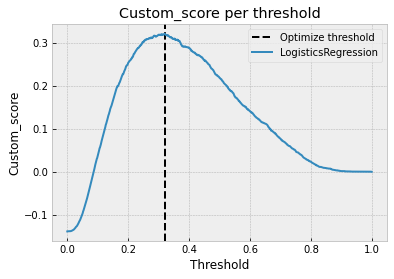

In [62]:
# %%flake8

# display graph of Custom_score per threshold

plt.axvline(x=thresholds[ix_cs], color='black', linestyle='--',
            label='Optimize threshold')
plt.plot(thresholds, scores_cs, label='LogisticsRegression')
plt.xlabel('Threshold')
plt.ylabel('Custom_score')
plt.title('Custom_score per threshold')
plt.legend()

# to save graph
plt.savefig('figures/Custom_score per threshold.png', bbox_inches='tight')

plt.show()

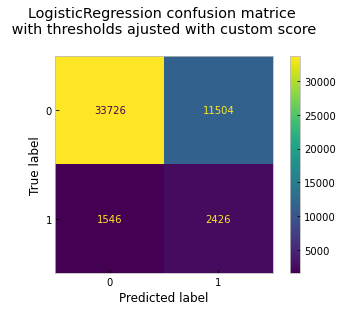

Threshold=0.320


In [63]:
# %%flake8

# display confusion matrix for custom_score with optimized thershold
cm_optimized_cs = confusion_matrix(y_sample2_test, (y_predict_proba >= thresholds[ix_cs]).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_cs)
disp.plot()
plt.grid(None)
plt.title('LogisticRegression confusion matrice \n with thresholds ajusted with custom score \n')

# to save graph
plt.savefig('figures/LogisticRegression confusion matrice with thresholds ajusted with custom score.png', bbox_inches='tight')

plt.show()
print('Threshold=%.3f' % (thresholds[ix_cs]))

In [64]:
# %%flake8

# evaluate the model with f2beta and thresholds = 0.5
score_base_fbs = fbeta_score(y_sample2_test, (y_predict_proba >= 0.5).astype('int'), beta=2)
print('F2score without threshold optimized: %.5f' % score_base_fbs)

F2score without threshold optimized: 0.29636


In [65]:
# %%flake8

# search thresholds for f2beta score

# apply threshold to positive probabilities for prediction
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold with f2beta
scores_fbs = [fbeta_score(y_sample2_test,
                          to_labels(y_predict_proba, t),
                          beta=2) for t in thresholds]
# get best threshold
ix_fbs = np.argmax(scores_fbs)
print('Best score with : \nThreshold=%.3f, F2score=%.5f' % (thresholds[ix_fbs], scores_fbs[ix_fbs]))

Best score with : 
Threshold=0.285, F2score=0.40837


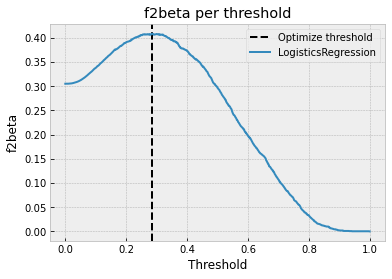

In [66]:
# %%flake8

# display graph of Custom_score per threshold
plt.axvline(x=thresholds[ix_fbs], color='black', linestyle='--', label='Optimize threshold')
plt.plot(thresholds, scores_fbs, label='LogisticsRegression')
plt.xlabel('Threshold')
plt.ylabel('f2beta')
plt.title('f2beta per threshold')
plt.legend()

# to save graph
plt.savefig('figures/f2beta per threshold.png', bbox_inches='tight')

plt.show()

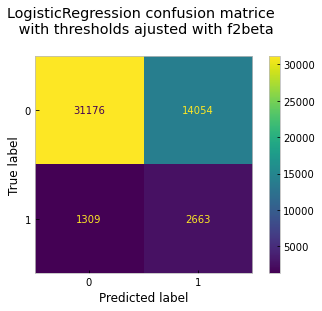

Threshold=0.285


In [67]:
# %%flake8

# display confusion matrix for féscore with optimized thershold
cm_optimized_fbs = confusion_matrix(y_sample2_test, (y_predict_proba >= thresholds[ix_fbs]).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_fbs)
disp.plot()
plt.grid(None)
plt.title('LogisticRegression confusion matrice \n with thresholds ajusted with f2beta\n')

# to save graph
plt.savefig('figures/LogisticRegression confusion matrice with thresholds ajusted with f2beta.png', bbox_inches='tight')

plt.show()
print('Threshold=%.3f' % (thresholds[ix_fbs]))

## Model evaluation

In [68]:
# %%flake8

# fit model on X_train data
model = model_selected.best_estimator_
model.fit(X_train.values, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('over', SMOTE(random_state=16, sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=16, sampling_strategy=0.4)),
                ['classifier',
                 LogisticRegression(C=0.1, max_iter=10000, random_state=16)]])

In [69]:
# %%flake8

# evaluate model on train datas (X_train and y_train)

# predict probabilities with model on X_train datas
y_train_proba = predict_proba_y(model, X_train)

# score with custom score
score_train_cs = custom_score(y_train, (y_train_proba >= thresholds[ix_cs]).astype('int'))

# score with f2score
score_train_fbs = fbeta_score(y_train, (y_train_proba >= thresholds[ix_fbs]).astype('int'), beta=2)

In [70]:
# %%flake8

# evaluate model on test datas (X_test and y_test)

# predict probabilities with model on X_test datas
y_test_predict = predict_proba_y(model, X_test)

# score with custom score
score_test_cs = custom_score(y_test, (y_test_predict >= thresholds[ix_cs]).astype('int'))

# score with f2score
score_test_fbs = fbeta_score(y_test, (y_test_predict >= thresholds[ix_fbs]).astype('int'), beta=2)

In [71]:
# %%flake8

def plot_2_variable(var1, var2, label1, label2, xlabel, ylabel, title):
    ''' Create a function to plot 2 varaible '''
    
    width = 0.3
    x = [1.5,2]
    fig, ax = plt.subplots(figsize=(2, 5))

    ax.bar(x[0],var1, width)
    ax.bar(x[1], var2, width)

    ax.set_xlabel('\n'+xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    plt.xticks(x,[label1,label2])

    # to save graph
    plt.savefig('figures/'+title+'.png', bbox_inches='tight')


    plt.show()

Custom score on X_train datas : 0.330
Custom score on X_test datas : 0.322


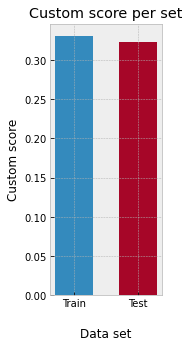



F2score on X_train datas : 0.415
F2score on X_test datas : 0.411


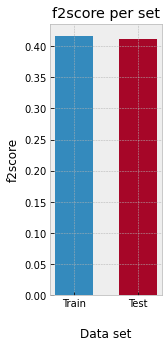

In [72]:
# display score for train and test datas
print('Custom score on X_train datas : %.3f' %score_train_cs)
print('Custom score on X_test datas : %.3f' %score_test_cs)
plot_2_variable(score_train_cs, score_test_cs, 'Train', 'Test', 'Data set', 'Custom score', 'Custom score per set')

print('\n') 
print('F2score on X_train datas : %.3f' %score_train_fbs)
print('F2score on X_test datas : %.3f' %score_test_fbs)
plot_2_variable(score_train_fbs, score_test_fbs, 'Train', 'Test', 'Data set', 'f2score', 'f2score per set')

 ## Explain the model

In [73]:
#load JS
shap.initjs()

In [74]:
# %%flake8

# prepare datas for the classifier (preprocessing and balancing)

# create a preprocessing pipeline: remove classifier and balancing step of the model
pipeline_preprocessing = imbpipeline(model.steps[:-3])

X_train_preproc = pipeline_preprocessing.fit_transform(X_train)

# convert to DataFrame for simplicity
X_train_preproc = pd.DataFrame(X_train_preproc, columns = features)

# create a balancing pipeline: remove classifier and preprocessing step of the model
pipeline_balancing = imbpipeline(model.steps[2:-1])

X_train_preproc_bal, y_train_preproc_bal = pipeline_balancing.fit_resample(X_train_preproc, y_train)

In [75]:
# %%flake8

# fit datas with the classifier
classifier = model['classifier']
classifier.fit(X_train_preproc_bal.values, y_train_preproc_bal)

LogisticRegression(C=0.1, max_iter=10000, random_state=16)

In [76]:
# %%flake8

# create an explainer with model and datas preprocessed
explainer = shap.LinearExplainer(classifier, X_train_preproc)

In [77]:
# %%flake8

# calculate chap values
shap_values = explainer(X_train_preproc)

### Global Interpretability

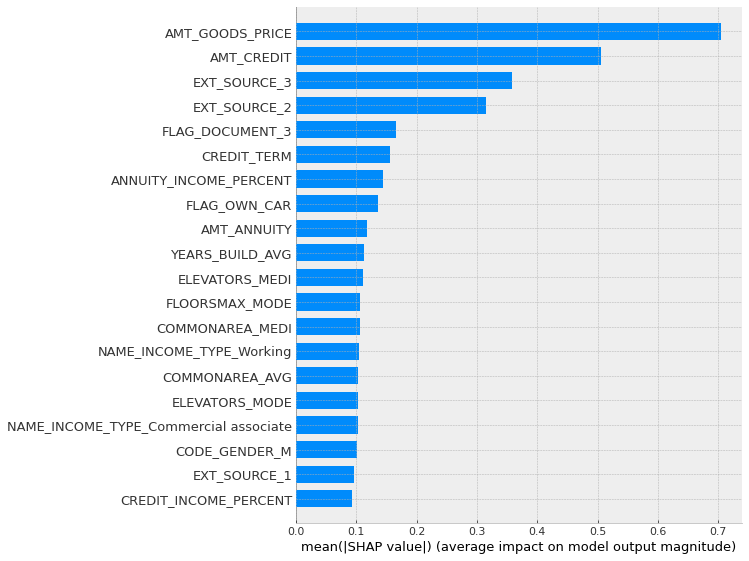

In [78]:
# %%flake8

#plot the feature importance with plot bar
shap.summary_plot(shap_values, X_train_preproc, plot_type="bar")

We can see that the features AMT_GOODS_PRICE, AMT_CREDIT, EXT_SOURCE_3 and EXT_SOURCE_2 are the features that have the most impact on the prediction

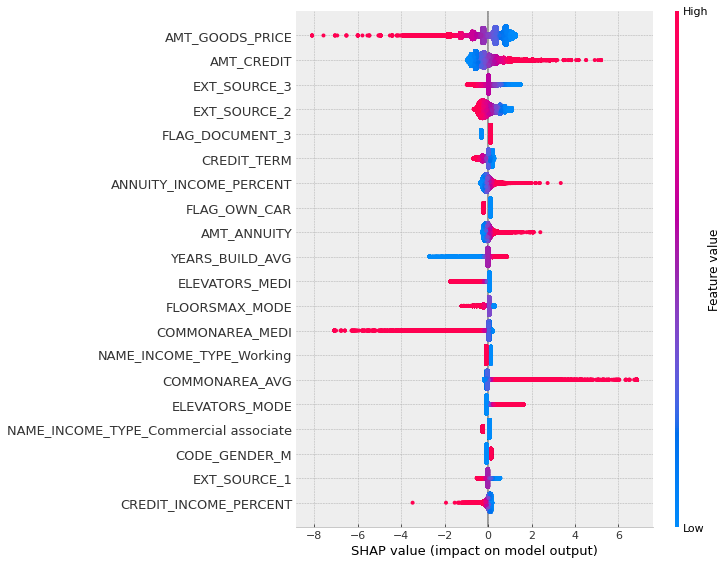

In [79]:
# %%flake8

# plot the feature importance
shap.summary_plot(shap_values, X_train_preproc)

High AMT_GOODS_PRICE value decreases the predicted default reimbursement
High AMT_CREDIT value increases the predicted default reimbursement

### Local Interpretability

In [80]:
# %%flake8

# calculate prediction for X_train_preproc
y_train_predict = (predict_proba_y(classifier,X_train_preproc)>= thresholds[ix_cs]).astype('int')
y_train_predict = pd.DataFrame(y_train_predict,columns=['Prediction'])

# index of a customer with default reimbursement 
customer_w_default = y_train_predict[y_train_predict['Prediction']==1].index[0]

# index of a customer with non default reimbursement 
customer_non_default = y_train_predict[y_train_predict['Prediction']==0].index[0]

In [81]:
# %%flake8

# visualize the prediction's explanation for a customer with default reimbursement with a force plot
shap.plots.force(shap_values[customer_w_default])

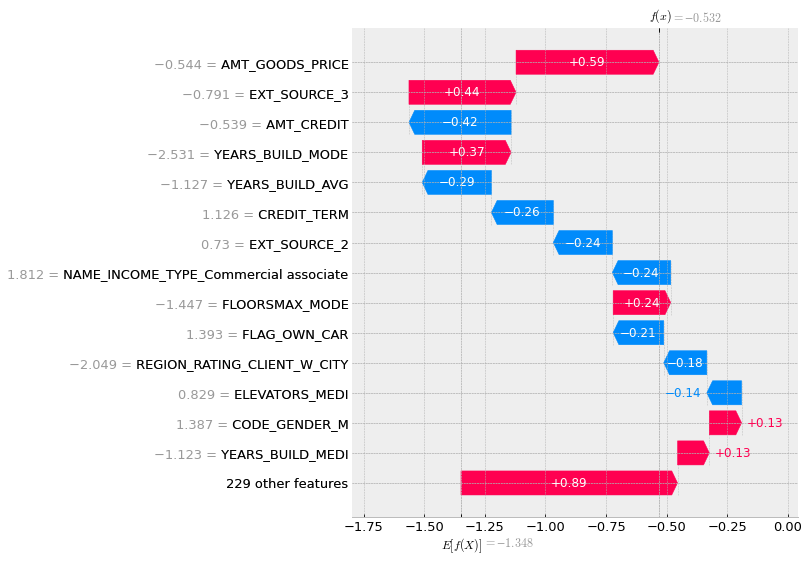

In [82]:
# %%flake8

# visualize the prediction's explanation for a customer with default reimbursement
shap.plots.waterfall(shap_values[customer_w_default], max_display = 15)

We can see for this customer the features (in red) that contribute to a default reimbursement prediction.

In [83]:
# %%flake8

# visualize the prediction's explanation for a customer with non default reimbursement with a force plot
shap.plots.force(shap_values[customer_non_default])

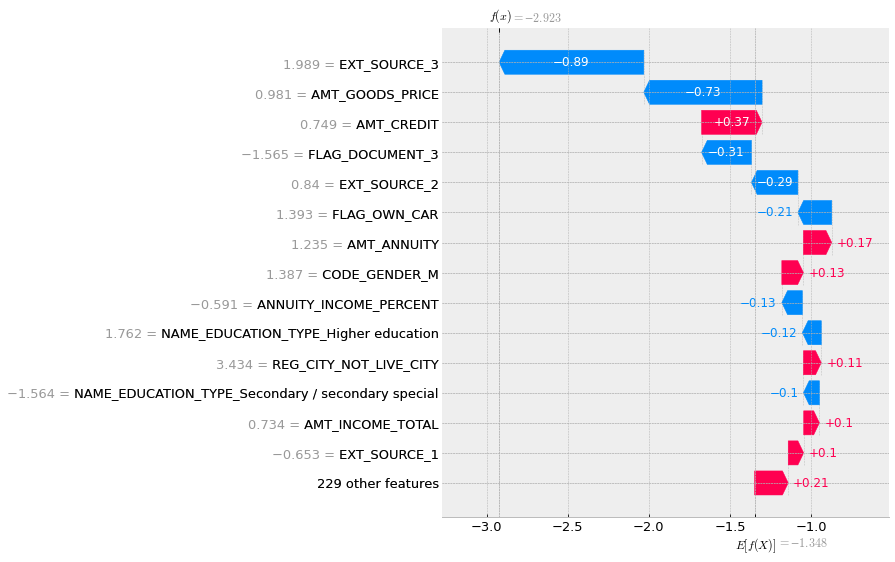

In [84]:
# %%flake8

# visualize the prediction's explanation for a customer with non default reimbursement 
shap.plots.waterfall(shap_values[customer_non_default], max_display = 15)

We can see for this customer the features (in blue) that contribute to a non default reimbursement prediction.

# Export model and explainer

In [85]:
# %%flake8

# create de pickle file of the classifier fited on X_train, y_train preprocessed and balanced
pickle.dump(classifier, open('models/model_classifier.pkl', 'wb'))

In [86]:
# %%flake8

# create a pickle file of explainer
pickle.dump(explainer, open('explainer/explainer.pkl', 'wb'))

In [87]:
# %%flake8

# create a list of ID of cutomers in X_test
customer_list = X_test.index.values.tolist()

In [88]:
# %%flake8

# load intial datas of Training data
app_train = pd.read_csv('input/application_train.csv')
app_train = app_train.drop(columns=['TARGET']).set_index('SK_ID_CURR')

# Fix anomalies like in exploration's notebook
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# fearture engineering
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

app_train.shape

(307511, 125)

In [89]:
# %%flake8

# select just customer in X_test
x_data_raw = app_train.loc[customer_list]
x_data_raw.shape

(61503, 125)

In [90]:
# %%flake8

# preprocessing X_test datas
X_test_preproc = pipeline_preprocessing.fit_transform(X_test)

# convert to DataFrame for simplicity
X_test_preproc = pd.DataFrame(X_test_preproc, index=X_test.index, columns = features)

In [91]:
# %%flake8

# calculate probability for cutsomers in X_test and add column in v
x_data_raw['probability'] = predict_proba_y(classifier,X_test_preproc)

# calculate prediction with best custom score thershold for in column in x_data_raw
x_data_raw['prediction'] = x_data_raw['probability'].apply(
    lambda x: (x >= thresholds[ix_cs]).astype('int'))

In [92]:
# %%flake8

# convert type of FLAG (boolean features) columns to object
for col in list(x_data_raw.filter(regex='FLAG').columns):
    x_data_raw[col] = x_data_raw[col].astype('object')
    

# calculate the mean value for numeric features
# extract numeric features in a dataframe
df_numeric_features = x_data_raw.select_dtypes(include=('int','float'))

# calculate mean 
df_numeric_features = df_numeric_features.groupby('prediction').mean()


# calculate mod for categorical features.
# extract categorial features
df_categorial_features = x_data_raw.select_dtypes(exclude=('int','float'))
# add column prediction to categorial features for groupby
df_categorial_features = pd.concat([df_categorial_features, x_data_raw['prediction']], axis=1)

# calculate mode
df_categorial_features = df_categorial_features.groupby('prediction').agg(pd.Series.mode)

In [93]:
# %%flake8

# concatenate mean and mode in a same dataframe
data_raw_mean_mode = pd.concat([df_numeric_features, df_categorial_features], axis=1)

data_raw_mean_mode.shape

(2, 126)

In [94]:
# %%flake8

# use sampling of datas for API and dashboard
X_sample_export = x_data_raw.sample(frac=0.05, random_state=rd_state)

# save datas to csv
X_sample_export.to_csv('datas/X_sample.csv')

# create a list of ID of cutomers in X_test
customer_list_X_sample = X_sample_export.index.values.tolist()

# select just data prepocessed of customers in X_sample_export
X_sample_export_preproc = X_test_preproc.loc[customer_list_X_sample]
# save to csv
X_sample_export_preproc.to_csv('datas/X_sample_preproc.csv')

# save mean and mode of the features
data_raw_mean_mode.to_csv('datas/X_sample_mean_mode.csv')

# export shap_values
shap_values_export = explainer(X_sample_export_preproc)
pickle.dump(shap_values_export, open('explainer/shap_values.pkl', 'wb'))